# Randam Forest Assiginment 
## In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics



In [2]:
from sklearn import datasets 
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['PRICE'] = boston.target


In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
bos.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

CRIM


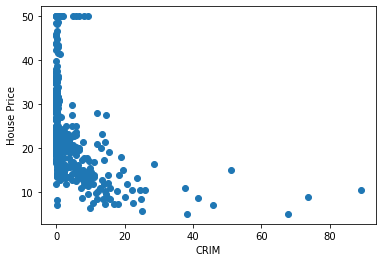

ZN


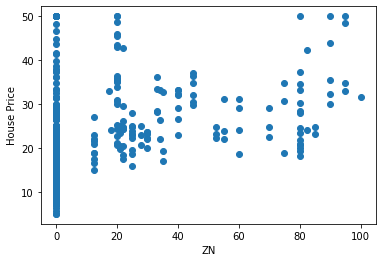

INDUS


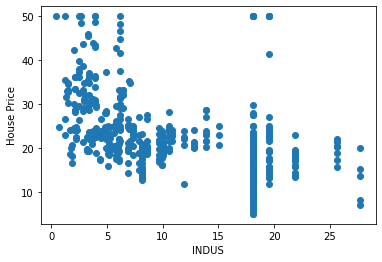

CHAS


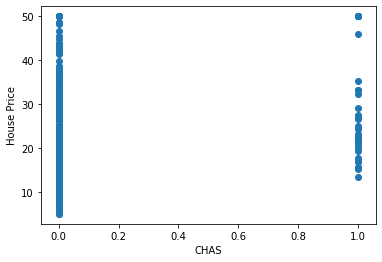

NOX


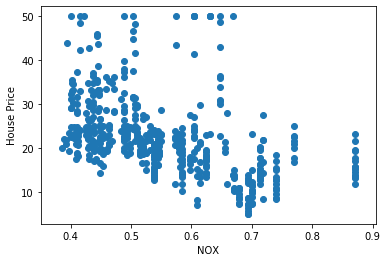

RM


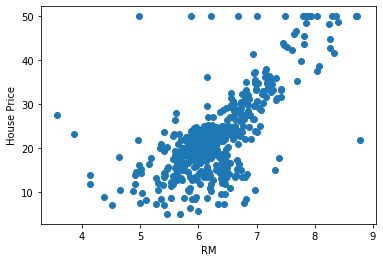

AGE


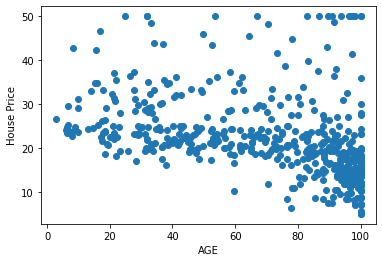

DIS


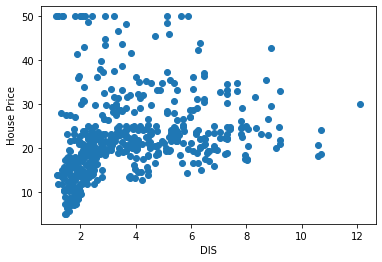

RAD


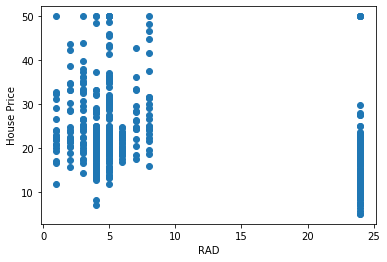

TAX


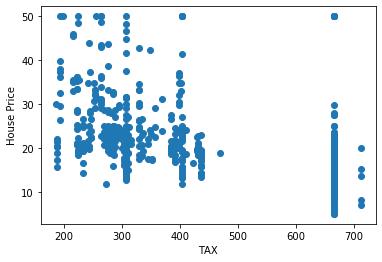

PTRATIO


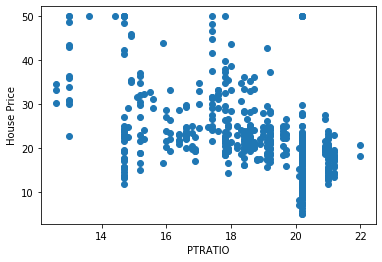

B


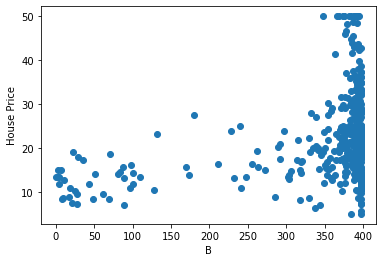

LSTAT


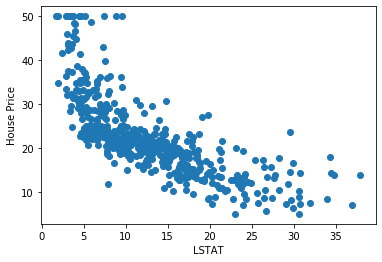

PRICE


In [8]:
#Lets visualise
for col in bos.columns:
    print(col)
    if (col != 'PRICE'):
        plt.scatter(bos[col],bos['PRICE'])
        plt.xlabel(col)
        plt.ylabel("House Price")
        plt.show()

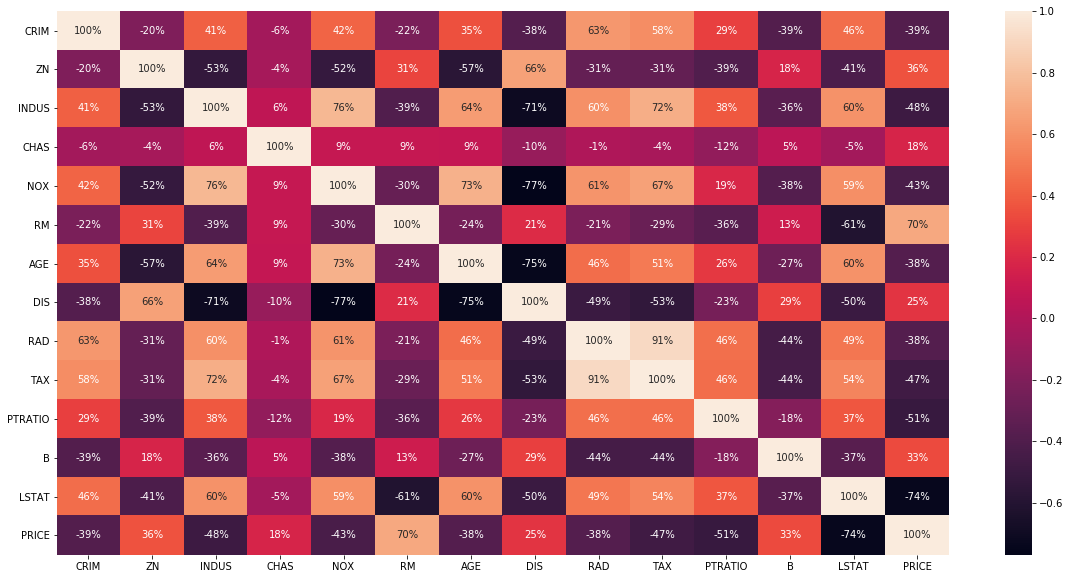

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(bos.corr(),annot=True,fmt= '.0%')

### RM shows the highest correlation with House price.
### RM is average number of rooms per dwelling, therefore it makes sense to have a positive linear relationship

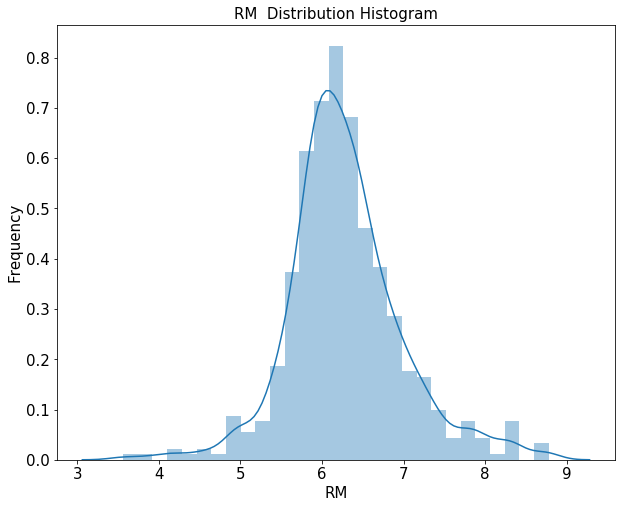

In [10]:

# Lets check the distribution of RM

plt.figure(figsize=[10,8])

plt.xlabel('Room size',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('RM  Distribution Histogram',fontsize=15)
sns.distplot(bos['RM'])
plt.show()

## Hypothesis Testing

###  Null hypothesis           : No relationship exists between RM and PRICE
### Alternative hypothesis: There exists a relationship between RM and PRICE



In [11]:
x = bos['RM']
y = bos['PRICE']


In [12]:
#Fitting linear regression using statsmodel

import statsmodels.api as smf

x = smf.add_constant(x) # adding a constant
ols = smf.OLS(y,x).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 26 Sep 2020   Prob (F-statistic):           2.49e-74
Time:                        12:06:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The regression coefficient for RM of 9.1021 means that on average, 
#### each additional room is associated with an increase of 9100 in house price net of the other variables.
#### since the p alue is 0 , we reject the NUll hypothesis and accept the alternate.
#### there exists a strong relationship between RM and Price

In [13]:
X = bos.drop(['PRICE'],axis=1)
y = bos['PRICE']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [15]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)

In [16]:

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(x_train_scale, y_train)

RandomForestRegressor()

In [17]:
y_train[0:10]

182    37.9
155    15.6
280    45.4
126    15.7
329    22.6
31     14.5
113    18.7
148    17.8
432    16.1
338    20.6
Name: PRICE, dtype: float64

In [18]:
# Model prediction on train data
y_pred = reg.predict(x_train_scale)
y_pred[0:10]

array([37.121, 16.264, 45.43 , 15.842, 22.881, 16.56 , 18.589, 15.963,
       17.646, 20.54 ])

In [19]:
reg.score(x_train_scale,y_train)

0.9772841015451269

In [20]:
#Model Evaluation on training data
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train_scale.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9772841015451269
Adjusted R^2: 0.976475042148104
MAE: 0.9203430079155669
MSE: 2.0144852084432703
RMSE: 1.4193256174829194


### Predicting the test data using model

In [21]:
reg.score(scaler.transform(x_test),y_test)

0.8610712695439391

In [22]:
y_pred_test = reg.predict(scaler.fit_transform(x_test))


In [23]:
#Model Evaluation on test data

print('R^2:', metrics.r2_score(y_test, y_pred_test))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: 0.8195398174688998
Adjusted R^2: 0.7987789115139945
MAE: 2.4955511811023623
MSE: 12.63711112598426
RMSE: 3.554871464059462


In [24]:
y_pred_test[0:10]

array([26.524, 34.659, 18.017, 24.48 , 16.455, 21.336, 19.265, 16.001,
       21.24 , 21.478])

In [25]:
y_test[0:10]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
76     20.0
316    17.8
140    14.0
471    19.6
500    16.8
Name: PRICE, dtype: float64

In [26]:
# let's save the model

import pickle

# Writing different model files to file
with open( 'RFRegression.pkl', 'wb') as f:
    pickle.dump(reg,f)
    
with open('StandardScalar.pkl', 'wb') as f:
    pickle.dump(scaler,f)


In [27]:
# lets verify:


filename1 = 'RFRegression.pkl'
filename2 = 'StandardScalar.pkl'
loaded_model1 = pickle.load(open(filename1, 'rb')) 
loaded_model2 = pickle.load(open(filename2, 'rb')) 
prediction=loaded_model1.predict(loaded_model2.transform([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]])) 
print(prediction[0])


30.69199999999999


In [28]:
prediction=loaded_model1.predict(loaded_model2.transform([[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14]])) 
print(prediction[0])

25.296999999999993
